In [1]:
import sys
import os
import pydicom
from pathlib import Path
import scipy.io


import matplotlib.pyplot as plt
import time
import pandas as pd
import csv
import math
import numpy as np
import glob

from shutil import copyfile

import plotly.express as px
from plotly.subplots import make_subplots

from ipywidgets import FloatSlider, interactive

# Review mets masks

In [29]:
MASK = '/data/public/MIM_BMETS_V6/3_final_datasets/first_treatments_1.5x1.5x3_256x256x64/testing/mets_masks/'

numpyMASKS = {}
c=0
fnames = glob.glob(MASK + '/' + '*.npy')
fnames.sort()
for np_name in fnames:
    numpyMASKS[c] = np.load(np_name, allow_pickle=True)
    c = c+ 1;

len(fnames)

150

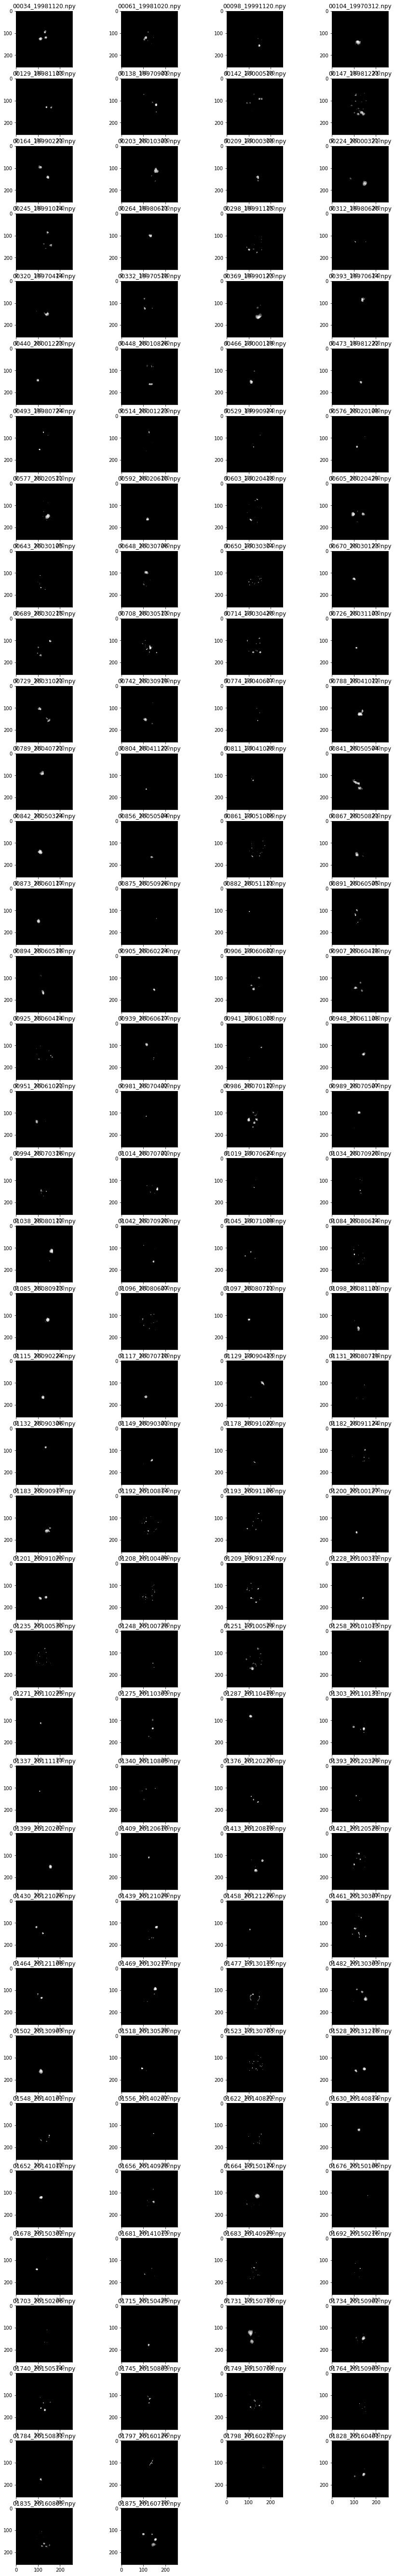

In [30]:
plt.figure(figsize=(15, 100))

for i in range(0,len(fnames)):
    if numpyMASKS[i].ndim != 0:
        plt.subplot(round(len(fnames)/4) + 1, 4, i+1)
        plt.imshow(sum(numpyMASKS[i]), cmap="gray")
        t = fnames[i].split('/')
        t2 = t[-1].split('-')
        plt.title(t2[-1])
        
        if (sum(sum(sum(numpyMASKS[i]))))  == 0: plt.title('Zero-mask '+t2[-1])
    else:
        plt.subplot(round(len(fnames)/4) + 1, 4, i+1)
        plt.imshow(np.zeros((256,256)), cmap="gray")
        t = fnames[i].split('/')
        t2 = t[-1].split('-')
        plt.title(t2[-1] + '_zeros')

Review first treatments

Training:
- 01161_20090512 - weird looking mask - removed study
- 00001_19990425 - zero mask - removed study

Validation:
- none

Testing:
- none

    
Review re_treatments:

Training:
- 01159_20090718 - brain mask - study removed
- 01264_20101230 - brain mask - study removed

Validation:
- none

Testing:
- none


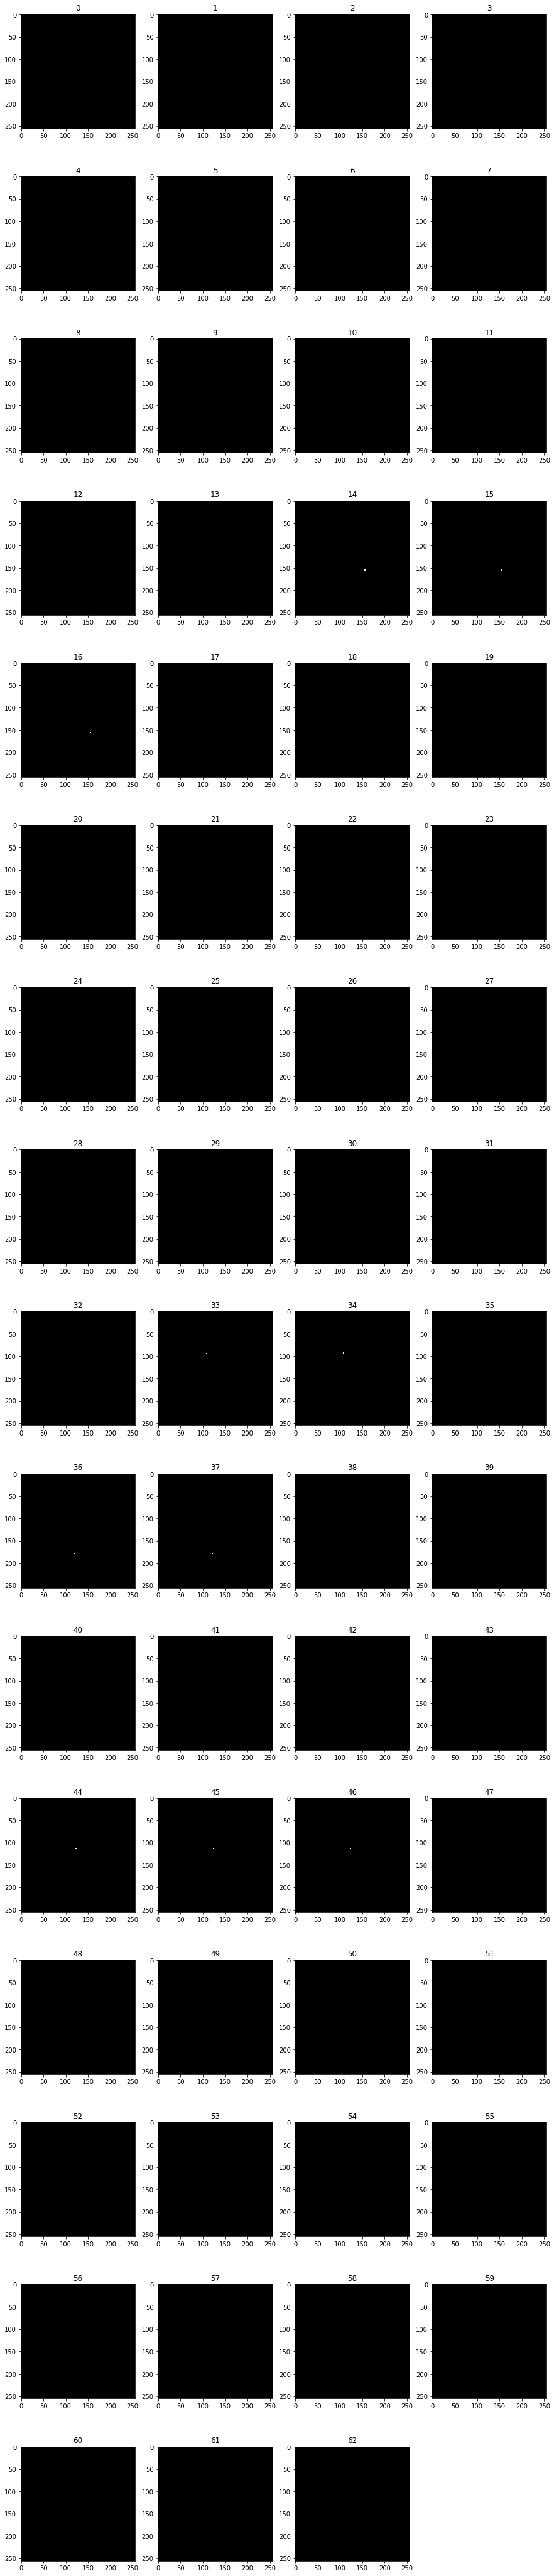

In [106]:
plt.figure(figsize=(15, 80))
vol = np.load('/data/public/MIM_BMETS_V6/2_processed/brain_masks/BrainMets-UCSF-01373_20111028.npy', allow_pickle=True)

#plt.figure
for i in range(0,len(vol)-1):
    img = vol[i]
    plt.subplot(round(len(vol)/4) + 1, 4, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(i)

# Review brain masks

In [36]:
MASK = '/data/public/MIM_BMETS_V6/3_final_datasets/first_treatments_1.5x1.5x3_256x256x64/testing/brain_masks/'

numpyMASKS = {}
c=0
fnamesBrain = glob.glob(MASK + '/' + '*.npy')
fnamesBrain.sort()
for np_name in fnamesBrain:
    numpyMASKS[c] = np.load(np_name)
    c = c+ 1;

len(fnamesBrain)

150

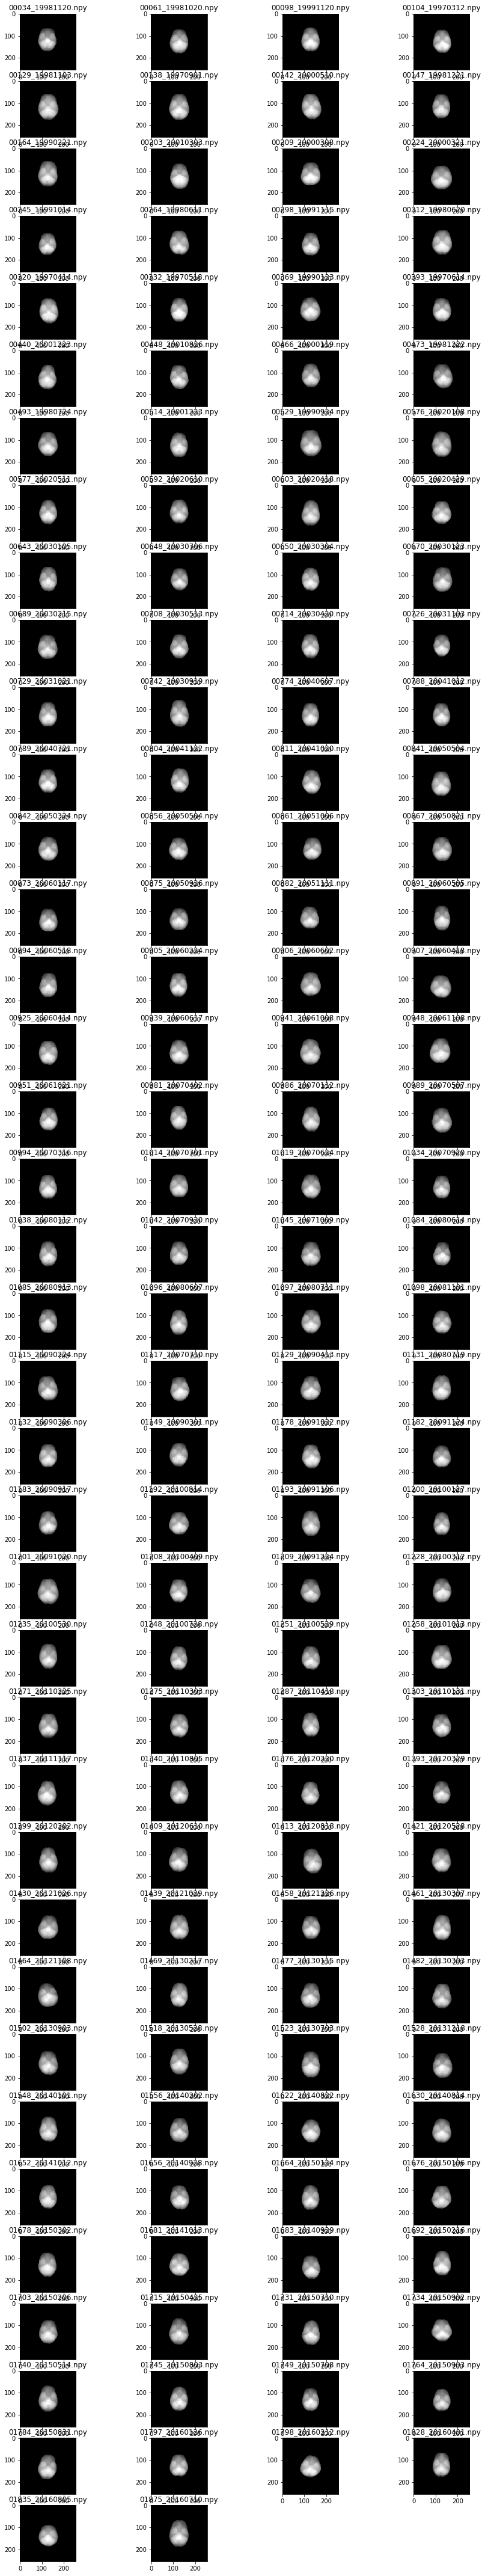

In [37]:
plt.figure(figsize=(15,80))

for i in range(0,len(fnamesBrain)):
    if numpyMASKS[i].ndim != 0:
        plt.subplot(round(len(fnamesBrain)/4) + 1, 4, i+1)
        plt.imshow(sum(numpyMASKS[i]), cmap="gray")
        t = fnamesBrain[i].split('/')
        t2 = t[-1].split('-')
        plt.title(t2[-1])
    else:
        plt.subplot(round(len(fnamesBrain)/4) + 1, 4, i+1)
        plt.imshow(np.zeros((256,256)), cmap="gray")
        t = fnamesBrain[i].split('/')
        t2 = t[-1].split('-')
        plt.title(t2[-1] + '_zeros')

First treatments

Training 
- 01023_20070402 - met mask - study removed

Validation:
- none

Testing:
- none

Retreatment

Training:
- none

Validation:
- 01373_20111028 - met mask - study removed

Testing:
- none

# Review brain images

In [45]:
IMAGES = '/data/public/MIM_BMETS_V6/3_final_datasets/first_treatments_1.5x1.5x3_256x256x64/testing/skull_stripped/'

numpyIMAGES = {}
c=0
fnames = glob.glob(IMAGES + '/' + '*.npy')
fnames.sort()
for np_name in fnames:
    numpyIMAGES[c] = np.load(np_name)
    c = c+ 1;
    
len(fnames)

150

In [117]:
w = FloatSlider(value=32,min=0,max=63,step=1,description='Slice:')

def InteractiveReview(z):
    fig = px.imshow(numpyIMAGES[178][int(z)], color_continuous_scale='gray', zmin=-1, zmax=1)
    fig.update_layout(height=400, width=600)
    fig.show()

In [118]:
interactive(InteractiveReview, z=w)

interactive(children=(FloatSlider(value=32.0, description='Slice:', max=63.0, step=1.0), Output()), _dom_class…

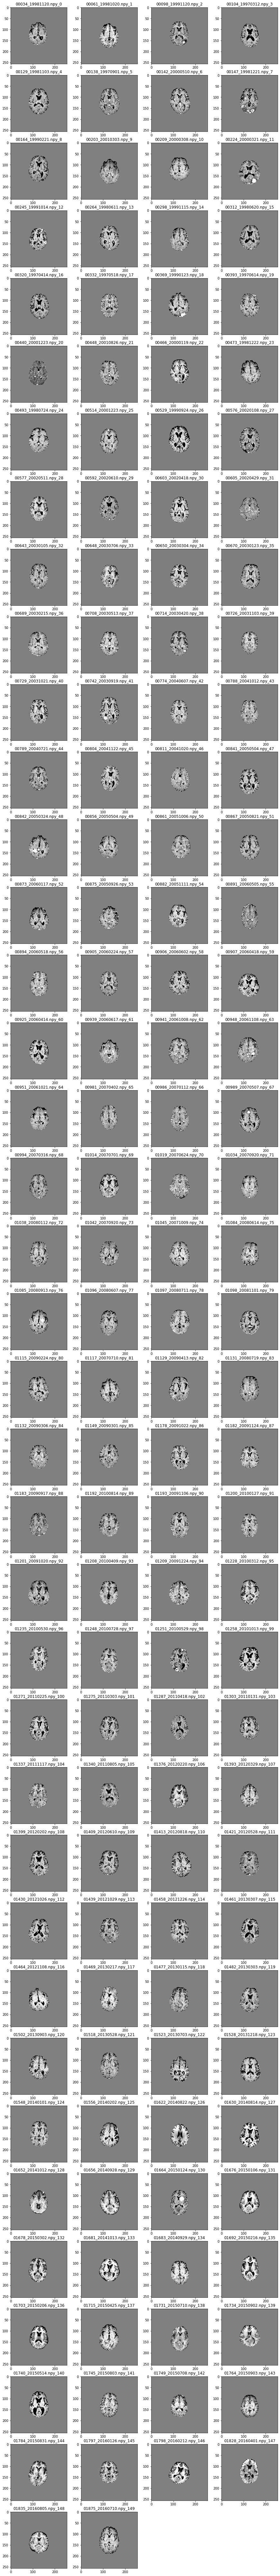

In [46]:
N = 32;

plt.figure(figsize=(15,150))
#plt.figure
for i in range(0,len(fnames)):
    im = numpyIMAGES[i]
    plt.subplot(round(len(fnames)/4) + 1, 4, i+1)
    plt.imshow(im[N,:,:], cmap="gray", vmin=-1, vmax=1)
    t = fnames[i].split('/')
    t2 = t[-1].split('-')
    plt.title(t2[-1] + '_' + str(i))

First treatment:

Training:
- 01695_20150317 - strange w/l - study removed

Validation:
- 01679_20150101 - strange w/l - study removed

Testing:
- none

Re_treatment:

Training:
- none

Validation:
- 01710_20150107 - strange w/l - study removed

Testing:
- none